In [1]:
# matplotlib / seaborn によるデータの可視化

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%precision 3
# グラフをJupyter Notebook内に表示させるための指定
%matplotlib inline

In [5]:
# データの準備
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2, 3, 4, 3, 5, 4, 6, 7, 4, 8])

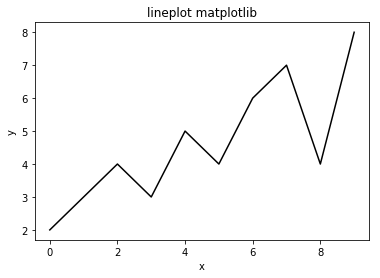

In [11]:
# 折れ線グラフ
plt.plot(x, y, color = 'black')
plt.title("lineplot matplotlib")
plt.xlabel("x")
plt.ylabel("y")
# plt.savefig("ファイル名")とすると作成したグラフをファイルに保存できる

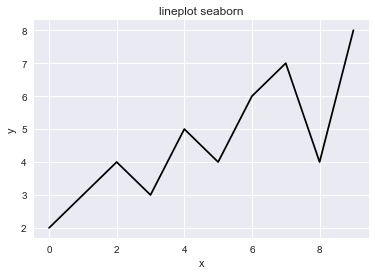

In [13]:
# seaborn + pyplotによる折れ線グラフ
sns.set()
plt.plot(x, y, color = 'black')
plt.title("lineplot seaborn")
plt.xlabel("x")
plt.ylabel("y")

[2 3 3 4 4 4 4 5 5 6]


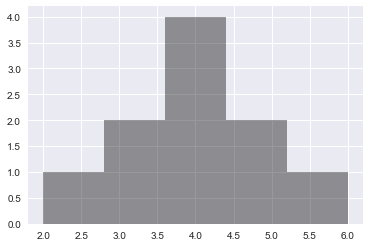

In [31]:
#  seabornによるヒストグラム
test_data_1 = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])
print(test_data_1)

sns.distplot(test_data_1, bins = len(set(test_data_1)), color = 'black', kde = False) # bins=区分数, kde=カーネル密度推定線の有無

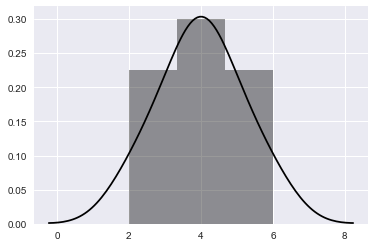

In [32]:
# カーネル密度推定によるヒストグラム平滑化
sns.distplot(test_data_1, color='black')

# 縦軸の数値の合計が　１　になるようになっており、グラフ内の面積を確率のように解釈できます。

In [36]:
# 2変量データに対するヒストグラム
## データ読み込み
test_data_2 = pd.read_csv("../statistics_python/3-3-2-fish_multi_2.csv")
print(test_data_2)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


In [39]:
## 種類ごとの統計量を計算
test_data_2.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [40]:
## 種類ごとにデータを取り出して変数に格納
length_a = test_data_2.query('species == "A"')["length"]
length_b = test_data_2.query('species == "B"')["length"]

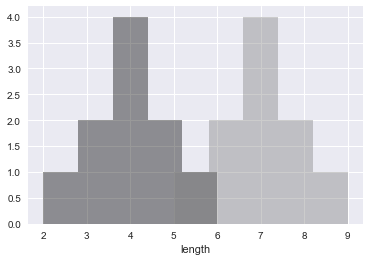

In [42]:
## ヒストグラムの関数を二回連続で実行すると重ね合わせたヒストグラムを書くことができます
sns.distplot(length_a, bins = len(set(length_a)), color = 'black', kde = False)
sns.distplot(length_b, bins = len(set(length_b)), color = 'gray', kde = False)

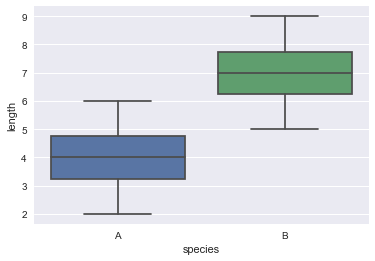

In [45]:
# 多変量データに対する図示の例
## 箱髭図（　boxplot　）
sns.boxplot(x = 'species', y = 'length', data = test_data_2)

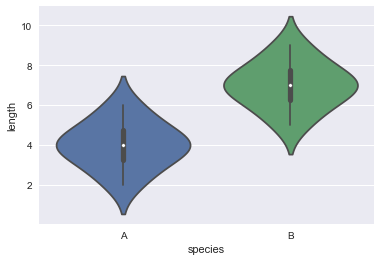

In [46]:
## バイオリンプロット（　violinplot　）
### 箱ひげ図の箱の代わりにカーネル密度推定の結果を用いた図示方法
sns.violinplot(x = 'species', y = 'length', data = test_data_2)

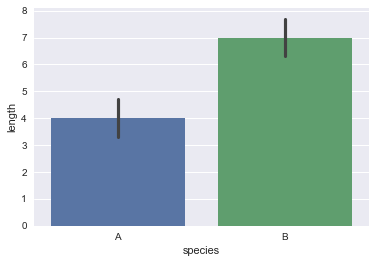

In [47]:
## 棒グラフ（　barplot　）
sns.barplot(x = 'species', y = 'length', data = test_data_2)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


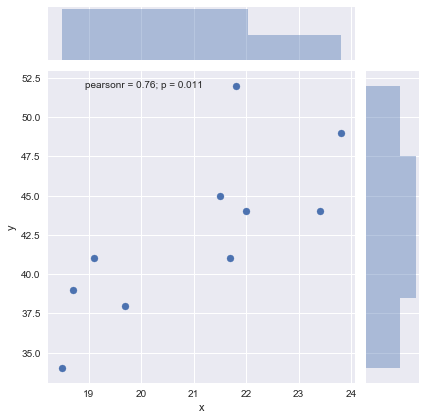

In [50]:
## 散布図（　joinplot　）

### データ読み込み
cov_data_1 = pd.read_csv('../statistics_python/3-2-3-cov.csv')
print(cov_data_1)

sns.jointplot(x = 'x', y = 'y', data = cov_data_1)

In [59]:
## ペアプロット（　pairplot　）

### データの読み込み

#### 'iris' はseaborn組み込みのアヤメのデータセットです
#### 中身はアヤメの種類(species)やガク(sepal),花弁(petal)の長さと幅を記録したデータです
iris = sns.load_dataset("iris")
iris.head(n = 5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [57]:
### データの特徴を見るため、アヤメの種類別の平均値を見てみます
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


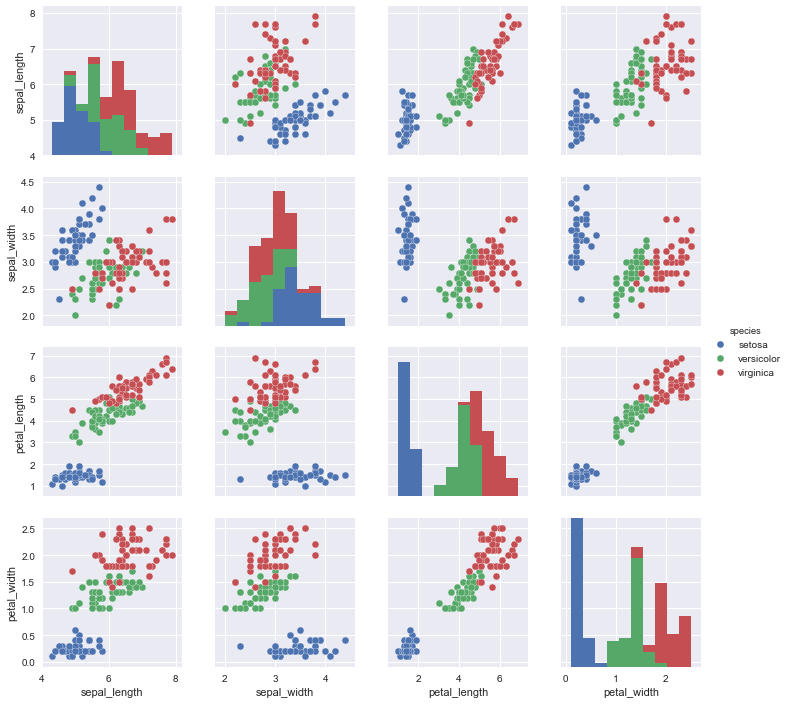

In [60]:
### データを図示
sns.pairplot(iris, hue = "species")